#Task 2.2: Descriptive Analytics - Geographical Demand Patterns

In [1]:
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Boston_2017_Cleaned_Data.csv", index_col=0)
data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [3]:
# Convert the start and end time to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [4]:
#Group by the start station ID, include only ID and name of the stations and use describe to get the number of rides.
#Then remove unnecessary columns and rename the column "top" to "station name"
groupedbyStartStation = data.groupby("start_station_id")['start_station_name'].describe()
groupedbyStartStation = groupedbyStartStation.sort_values(['count'], ascending=False)[["count", "top"]]  
groupedbyStartStation = groupedbyStartStation.rename({"top": "station_name"}, axis=1)
groupedbyStartStation

,count,station_name
start_station_id,,
67,42320,MIT at Mass Ave / Amherst St
22,27842,South Station - 700 Atlantic Ave
68,26415,Central Square at Mass Ave / Essex St
80,24532,MIT Stata Center at Vassar St / Main St
189,23910,Kendall T
...,...,...
203,165,Columbia Rd at Ceylon St
1,71,18 Dorrance Warehouse
207,47,Faneuil St at Market St


In [5]:
#Do the the same priorly done with the start stations.
groupedbyEndStation = data.groupby("end_station_id")['end_station_name'].describe()
groupedbyEndStation = groupedbyEndStation.sort_values(['count'], ascending=False)[["count", "top"]]
groupedbyEndStation = groupedbyEndStation.rename({"top": "station_name"}, axis=1)
groupedbyEndStation

,count,station_name
end_station_id,,
67,42442,MIT at Mass Ave / Amherst St
80,33517,MIT Stata Center at Vassar St / Main St
22,26981,South Station - 700 Atlantic Ave
68,26232,Central Square at Mass Ave / Essex St
190,25851,Nashua Street at Red Auerbach Way
...,...,...
181,185,Huron Ave. At Vassal Lane
203,160,Columbia Rd at Ceylon St
207,51,Faneuil St at Market St


In [12]:
# Merge the start and end stations'data and remove duplicates. 
#Then consolidate the columns counting the rides from and towards a station in a new column and rename the station name column.
#At last, sort by the total number of rides per station.

freq = pd.merge(groupedbyStartStation, groupedbyEndStation, left_index=True, right_index=True)

freq = freq.drop("station_name_y", axis=1)

freq['total_count'] = freq.count_x+freq.count_y
freq = freq.drop(["count_x", "count_y"], axis=1)

freq = freq.rename({"station_name_x": "station_name"}, axis=1)

freq = freq.sort_values(['total_count'], ascending=False)

freq


,station_name,total_count
67,MIT at Mass Ave / Amherst St,84762
80,MIT Stata Center at Vassar St / Main St,58049
22,South Station - 700 Atlantic Ave,54823
68,Central Square at Mass Ave / Essex St,52647
189,Kendall T,46495
...,...,...
1,18 Dorrance Warehouse,336
203,Columbia Rd at Ceylon St,325
207,Faneuil St at Market St,98
164,Test 000e3,43


In [13]:
# Save the total number of rides per station in a csv file to be able to create a heat map.
freq.to_csv('rides_per_station_2017.csv')

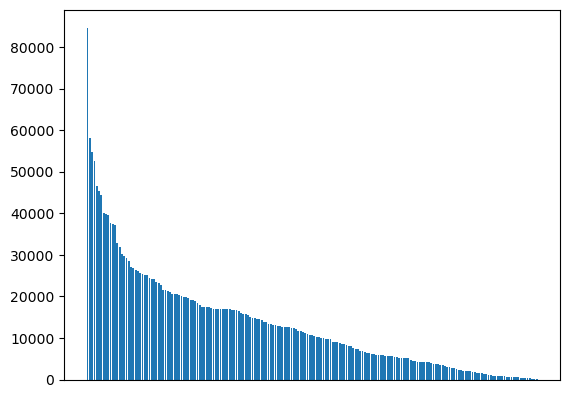

In [7]:
#Visualize the total ride numbers from the step before.
plt.bar(freq["station_name"], freq["total_count"])
f = plt.gca()
f.axes.get_xaxis().set_visible(False)

In [8]:
# Identify popular routes through grouping be the station names and order by the number of rides counted.
routes = data.groupby(["start_station_name", "end_station_name"]).size().reset_index().rename(columns={0: 'count'})
routes = routes.sort_values(["count"], ascending=False)
routes.head(20)

,start_station_name,end_station_name,count
2146,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,4783
17174,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,4349
17101,MIT Vassar St,MIT Stata Center at Vassar St / Main St,3876
17276,MIT at Mass Ave / Amherst St,MIT Vassar St,3732
17103,MIT Vassar St,MIT at Mass Ave / Amherst St,3274
16742,MIT Pacific St at Purrington St,MIT Stata Center at Vassar St / Main St,3035
16929,MIT Stata Center at Vassar St / Main St,MIT Vassar St,2649
16084,Linear Park - Mass. Ave. at Cameron Ave.,Davis Square,2462
10139,Davis Square,Linear Park - Mass. Ave. at Cameron Ave.,2347
16927,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,2303


In [9]:
#Create a column containing information on whether start and end station are the same and inserting the trip duration by subtracting the start time from the end time.
df = pd.DataFrame({'same_start_and_end': data["end_station_id"] == data["start_station_id"], 'trip_duration': data["end_time"]-data["start_time"]})
df.groupby("same_start_and_end").describe()

trip_duration                             \
                           count                       mean   
same_start_and_end                                            
False                    1272784  0 days 00:17:35.889480068   
True                       40972  0 days 00:59:48.893854339   

                                                                \
                                          std              min   
same_start_and_end                                               
False               0 days 03:33:27.861319357  0 days 00:01:01   
True                0 days 05:17:30.801144252  0 days 00:01:01   

                                                                       \
                                25%              50%              75%   
same_start_and_end                                                      
False               0 days 00:06:33  0 days 00:10:47  0 days 00:17:30   
True                0 days 00:09:53  0 days 00:23:43  0 days 00:53:53   

                                      
                                 max  
same_start_and_end                    
False               48 days 08:40:21  
True                26 days 14:34:32